# Задания 1-3
1. Сгенерировать вектор в(3) и хорошо обусловленную матрицу А(3,3)так, чтобы получить заданное решение. 
2. Сгенерировать вектор c(3) и плохо обусловленную матрицу D(3,3) 
3. Проверить обусловленность матриц 

In [2]:
A = [[3,2,1], [-1, 2, 3], [4, -5, 6]]
b = [5, 4, -1]
 
def array(*args):
    lst = []
    error = 0.03
    for elem in args:
        if not isinstance(elem, list):
            lst.append(elem * error)
        else:
            lst.extend(array(*elem))
    return lst
 
print(array(A))

[0.09, 0.06, 0.03, -0.03, 0.06, 0.09, 0.12, -0.15, 0.18]


# Задание 4. Решить СЛАУ AX=b и DX=c методом Крамера

Решение СЛАУ Ax=b

In [1]:
import numpy as np
from numpy import linalg 
A = np.array([[3, 5, 15], [4, 8, 9], [18, 12, 7]]) 
b = np.array([12, 13, 16])
def Cramer(A,b): #Создание метод Крамера с помощью пользовательской функции
    matrix = len(A) #определяем кол-во строк в матрице А
    det = np.linalg.det(A) #вычисляем определитель матрицы А
    result = list() #создаем пустой список, куда будут помещаться неизвестные
    for i in range(matrix): 
        auxmat = np.copy(A) #создаем вспомогательную матрицу
        auxmat[:,i] = b #присваиваем всем строкам i-столбца вектор свободных членов
        result.append(np.linalg.det(auxmat)/det) #добавление в список элементов
    return result
x = Cramer(A,b) #вызов функции
print(x)
print(np.matmul(A, x)) #проверка правильности решения 

[-0.06587473002159822, 1.1889848812095039, 0.4168466522678186]
[12. 13. 16.]


Решение СЛАУ Dx=c

In [17]:
D = np.array([[2, 16, 18], [22, 14, 19], [8, 9, 10]]) 
c = np.array([13, 15, 17])
def Cramer(D,c): 
    matrix = len(D) 
    det = np.linalg.det(D) 
    result = list() 
    for i in range(matrix): 
        auxmat = np.copy(D) 
        auxmat[:,i] = c
        result.append(np.linalg.det(auxmat)/det) 
    return result
x1 = Cramer(D,c) 
print(x1)
print(np.matmul(D, x1))

[1.2839195979899498, 8.396984924623128, -6.8844221105527605]
[13. 15. 17.]


In [1]:
def cramer(mat, constant):
    D = np.linalg.det(mat)
    mat1 = np.array([constant, mat[:, 1], mat[:, 2]]) #замена столбца константой и создание новой матрицы
    mat2 = np.array([mat[:, 0], constant, mat[:, 2]])
    mat3 = np.array([mat[:, 0], mat[:, 1], constant])
    Dx = np.linalg.det([mat1, mat2, mat3]) #вычисление определителя получившейся матрицы
    X = Dx/D
    print(X)

In [15]:
D = np.array([[2, 16, 18], [22, 14, 19], [8, 9, 10]]) 
c = np.array([13, 15, 17])
cramer(D,c)

[ 1.2839196   8.39698492 -6.88442211]


# Задание 5. Оценить вычислительную ошибку, решив  СЛАУ  Ах=в и Dх=c встроенными средствами и сравнить с методом Крамера

In [2]:
A = np.array([[3, 5, 15], [4, 8, 9], [18, 12, 7]]) #создание матрицы А, массив коэф. СЛАУ
b = np.array([12, 13, 16]) #генерация вектора b
x = np.linalg.solve(A,b) #решение СЛАУ Ax=b

print('X = ', x)

X =  [-0.06587473  1.18898488  0.41684665]


In [3]:
D = np.array([[2, 16, 18], [22, 14, 19], [8, 9, 10]]) #создание матрицы D, массив коэф. СЛАУ
c = np.array([13, 15, 17]) #генерация вектора c
x = np.linalg.solve(D,c) #решение СЛАУ Dx=c
print("X = ", x)

X =  [ 1.2839196   8.39698492 -6.88442211]


# Задание 6. Выполнить индивидуальное задание, используя метод Крамера.

Проверить чувствительность к ошибке в правой части. Для этого выполнить вычисления для погрешности в в пределах 1% -10% от исходного значения вектора правых частей в1 и в2. Построить графическую иллюстрацию результата.

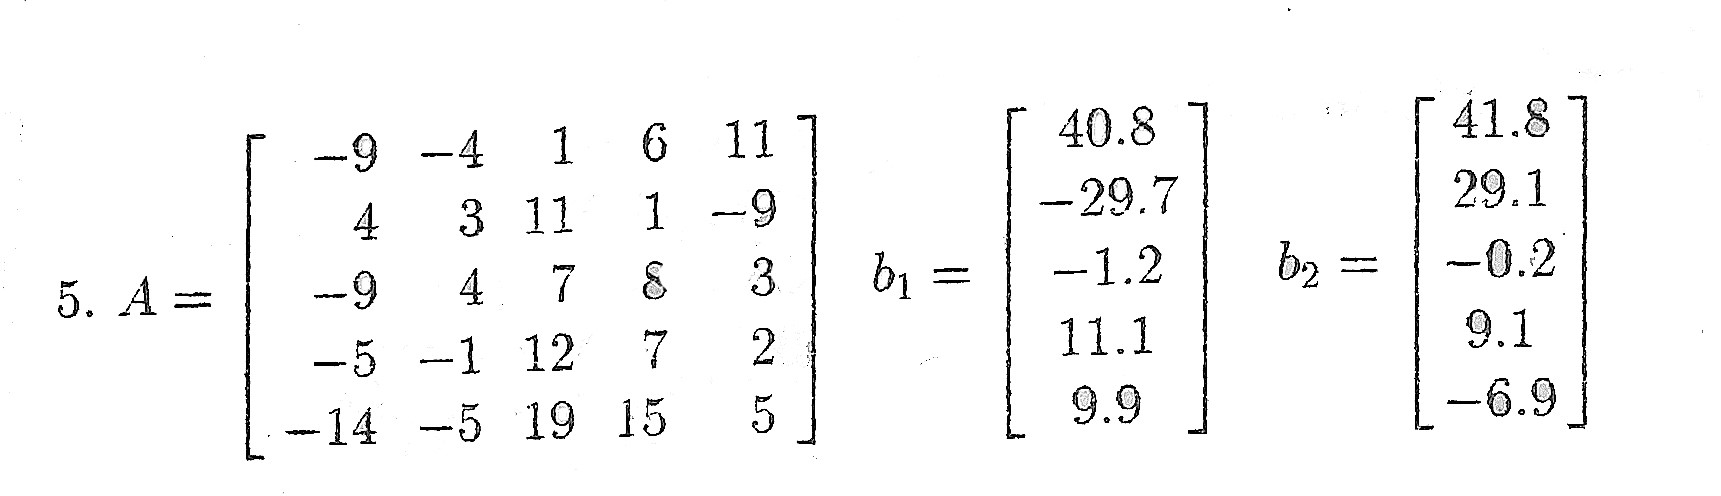

In [5]:
#Решение текущей СЛАУ, указанной в методических материалах. Вектор b1
def cramer(mat, constant):
    A = np.linalg.det(mat)
    mat1 = np.array([constant, mat[:, 1], mat[:, 2], mat[:, 3], mat[:, 4]]) #замена столбца константой и создание новой матрицы
    mat2 = np.array([mat[:, 0], constant, mat[:, 2], mat[:, 3], mat[:, 4]])
    mat3 = np.array([mat[:, 0], mat[:, 1], constant, mat[:, 3], mat[:, 4]])
    mat4 = np.array([mat[:, 0], mat[:, 1], mat[:, 2], constant, mat[:, 4]])
    mat5 = np.array([mat[:, 0], mat[:, 1], mat[:, 2], mat[:, 3], constant])
    Ax = np.linalg.det([mat1, mat2, mat3, mat4, mat5]) #вычисление определителя получившейся матрицы
    ans = Ax/A
    print(ans)

In [15]:
A = np.array([[-9, -4, 1, 6, 11], [4, 3, 11, 1, -9], [-9, 4, 7, 8, 3], [-5,-1, 12, 7, 2], [-14, -5, 19, 15, 5]]) 
b1 = np.array([40.8, -29.7, -1.2, 11.1, 9.9])
cramer(A, b1)

[-1.17936546e+01  2.09673042e-15  9.80747030e+00 -2.47843489e+01
  8.08545427e+00]


In [4]:
A = np.array([[-9, -4, 1, 6, 11], [4, 3, 11, 1, -9], [-9, 4, 7, 8, 3], [-5,-1, 12, 7, 2], [-14, -5, 19, 15, 5]]) 
b1 = np.array([40.8, -29.7, -1.2, 11.1, 9.9])
def Cramer(A, b1): 
    matrix = len(A) 
    det = np.linalg.det(A) 
    result = list() 
    for i in range(matrix): 
        auxmat = np.copy(A) 
        auxmat[:,i] = b1
        result.append(np.linalg.det(auxmat)/det) 
    return result
ans = Cramer(A, b1) 
print(ans)

[-6.577848794171915, 0.10802147110697997, 2.737518419622545, 3.074182090378982, 6.199705286039756]


In [7]:
#Проверка чувствительности правой части к погрешности вектора b1
A = np.array([[-9, -4, 1, 6, 11], [4, 3, 11, 1, -9], [-9, 4, 7, 8, 3], [-5,-1, 12, 7, 2], [-14, -5, 19, 15, 5]]) 
b1 = np.array([42.8, -27.7, -1.1, 10.1, 9])
def Cramer(A, b1): 
    matrix = len(A) 
    det = np.linalg.det(A) 
    result = list() 
    for i in range(matrix): 
        auxmat = np.copy(A) 
        auxmat[:,i] = b1
        result.append(np.linalg.det(auxmat)/det) 
    return result
ans01 = Cramer(A, b1) 
print(ans01)

[1.0176059057074018e+16, -2.2719566409554974, -4957567232933500.0, 1.5707660390662938e+16, 208739672965623.9]


In [8]:
#Решение СЛАУ с вектором b2
A = np.array([[-9, -4, 1, 6, 11], [4, 3, 11, 1, -9], [-9, 4, 7, 8, 3], [-5,-1, 12, 7, 2], [-14, -5, 19, 15, 5]]) 
b2 = np.array([41.8, 29.1, -0.2, 9.1, -6.9])
def Cramer(A, b2): 
    matrix = len(A) 
    det = np.linalg.det(A) 
    result = list() 
    for i in range(matrix): 
        auxmat = np.copy(A) 
        auxmat[:,i] = b2
        result.append(np.linalg.det(auxmat)/det) 
    return result
x2 = Cramer(A, b2) 
print(x2)

[1.2414792049630302e+17, -35.24879114390114, -6.048232024178859e+16, 1.916334567660882e+17, 2546624010180543.5]


In [9]:
#Проверка чувствительности правой части к погрешности вектора b2
A = np.array([[-9, -4, 1, 6, 11], [4, 3, 11, 1, -9], [-9, 4, 7, 8, 3], [-5,-1, 12, 7, 2], [-14, -5, 19, 15, 5]]) 
b2 = np.array([38.8, 28.1, -0.18, 8.5, -6.4])
def Cramer(A, b2): 
    matrix = len(A) 
    det = np.linalg.det(A) 
    result = list() 
    for i in range(matrix): 
        auxmat = np.copy(A) 
        auxmat[:,i] = b2
        result.append(np.linalg.det(auxmat)/det) 
    return result
x22 = Cramer(A, b2) 
print(x22)

[1.1804228506205835e+17, -19.55597649610194, -5.7507779902028376e+16, 1.8220886053169005e+17, 2421380206401176.0]


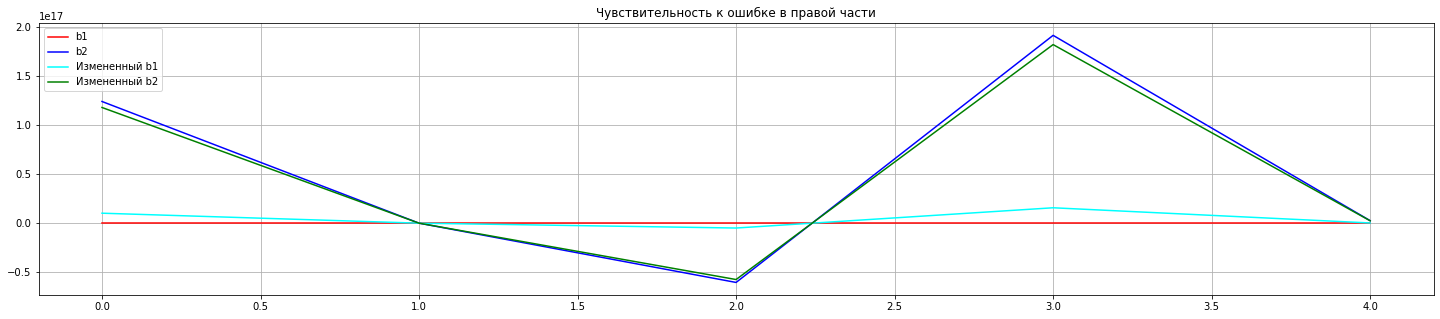

In [17]:
#Графическая иллюстрация результата
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(25,5))
plt.plot(ans, color = "red", linestyle = "solid", label='b1')
plt.plot(x2, color = "blue", linestyle = "solid", label='b2')
plt.plot(ans01, color = "cyan", linestyle = "solid", label='Измененный b1')
plt.plot(x22, color = "green", linestyle = "solid", label = 'Измененный b2')
plt.title("Чувствительность к ошибке в правой части")
plt.legend(loc='upper left')
plt.grid()
plt.show()